<a href="https://colab.research.google.com/github/Jiyeon1104/ai/blob/main/Day14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 구글 드라이브 연결

from google.colab import drive
drive.mount('/gdrive/')
drivepath = '/gdrive/MyDrive/Colab Notebooks/titanic/'

Mounted at /gdrive/


In [ ]:
import pandas as pd

train = pd.read_csv(drivepath + '/train.csv')

test = pd.read_csv(drivepath + 'test.csv')

submission = pd.read_csv(drivepath + 'submission.csv')

print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

# test에는 목표 변수 Survivied에 대한 데이터가 없음

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
submission.head()

# 예측 값을 survivied에 입력하여 제출함

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# train 데이터 프레임의 통계 정보

train.describe()
# 기본적으로 숫자 데이터만 정보를 분석해줌


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


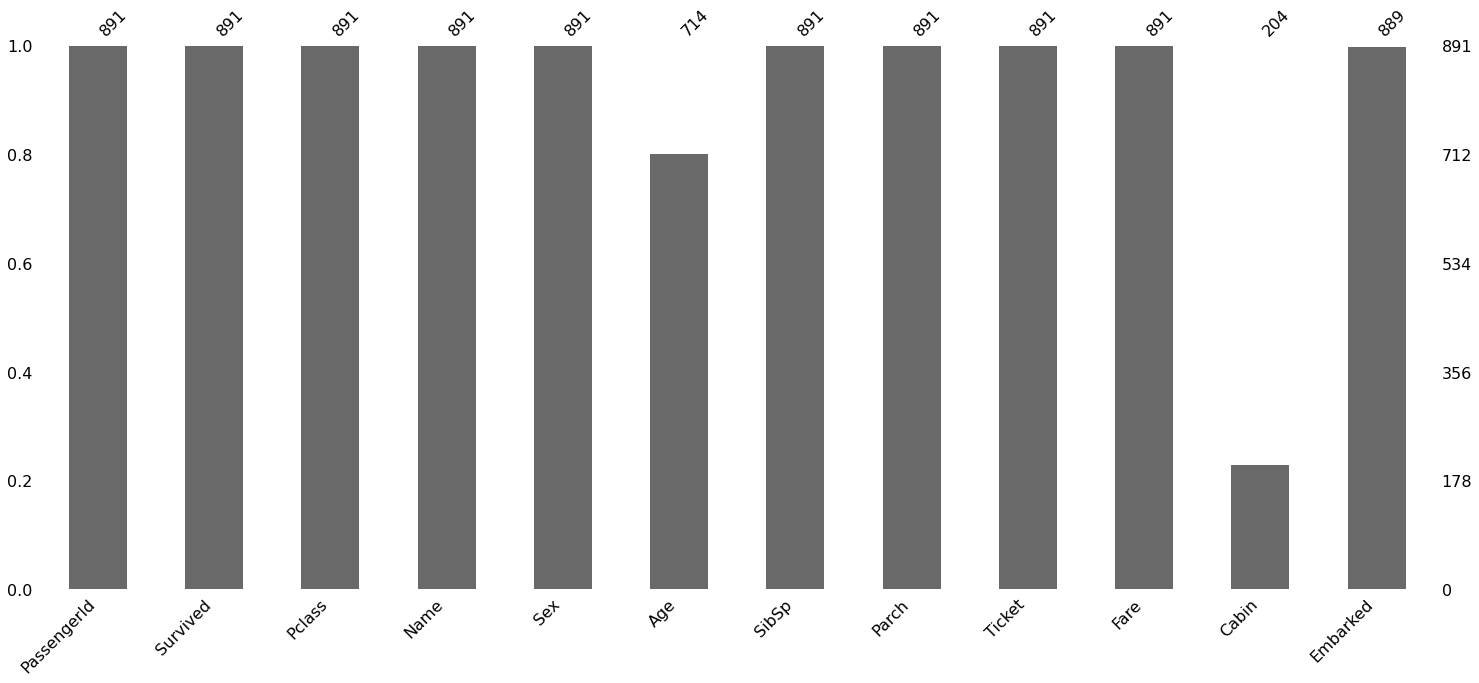

In [ ]:
# 결측치 확인

import missingno as msno

msno.bmar(train)

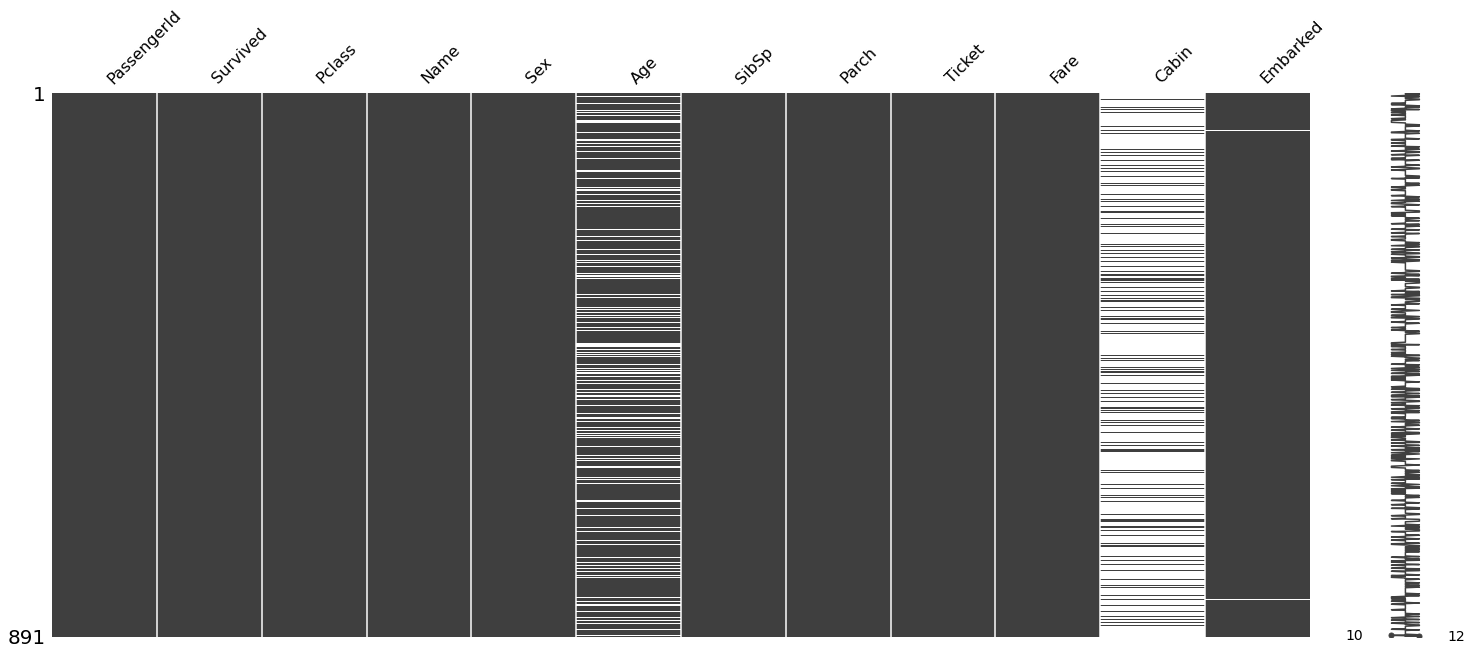

In [ ]:
import missingno as msno

msno.matrix(train)

In [ ]:
# 상관관계 분석

train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


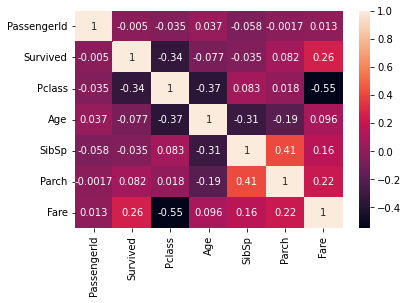

In [ ]:
import seaborn as sns
sns.heatmap(train.corr(), annot = True)
 # 목표변수 survived 열과 상관관계가 높은 피처는 Pclass - 34% , Fare - 26%
 # 객실 등급과 객실 요금이 강한 상관 관계를 보임

In [ ]:
# survived까지 있음
len(train)

891

In [ ]:
len(test)

418

In [ ]:
# 타이타닉 전체 데이터셋 병합

train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'

In [ ]:
data = pd.concat([train,test], axis = 0)
data.head()
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Test


In [ ]:
# 숫자형 피처 값들만 추출
data_num = data.loc[:,['Pclass','Age','SibSp','Parch','Fare','Survived']]
data_num

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.0,1,0,7.2500,0.0
1,1,38.0,1,0,71.2833,1.0
2,3,26.0,0,0,7.9250,1.0
3,1,35.0,1,0,53.1000,1.0
4,3,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,NaN
414,1,39.0,0,0,108.9000,NaN
415,3,38.5,0,0,7.2500,NaN
416,3,NaN,0,0,8.0500,NaN


In [ ]:
# 결측값 대체

data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean()) # 결측치를 나이의 평균으로 처리함
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0]) # 결측치를 요금의 최빈값으로 처리함

In [ ]:
data_num.info

<bound method DataFrame.info of      Pclass        Age  SibSp  Parch      Fare  Survived
0         3  22.000000      1      0    7.2500       0.0
1         1  38.000000      1      0   71.2833       1.0
2         3  26.000000      0      0    7.9250       1.0
3         1  35.000000      1      0   53.1000       1.0
4         3  35.000000      0      0    8.0500       0.0
..      ...        ...    ...    ...       ...       ...
413       3  29.881138      0      0    8.0500       NaN
414       1  39.000000      0      0  108.9000       NaN
415       3  38.500000      0      0    7.2500       NaN
416       3  29.881138      0      0    8.0500       NaN
417       3  29.881138      1      1   22.3583       NaN

[1309 rows x 6 columns]>

In [ ]:
data_num.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Survived    418
dtype: int64

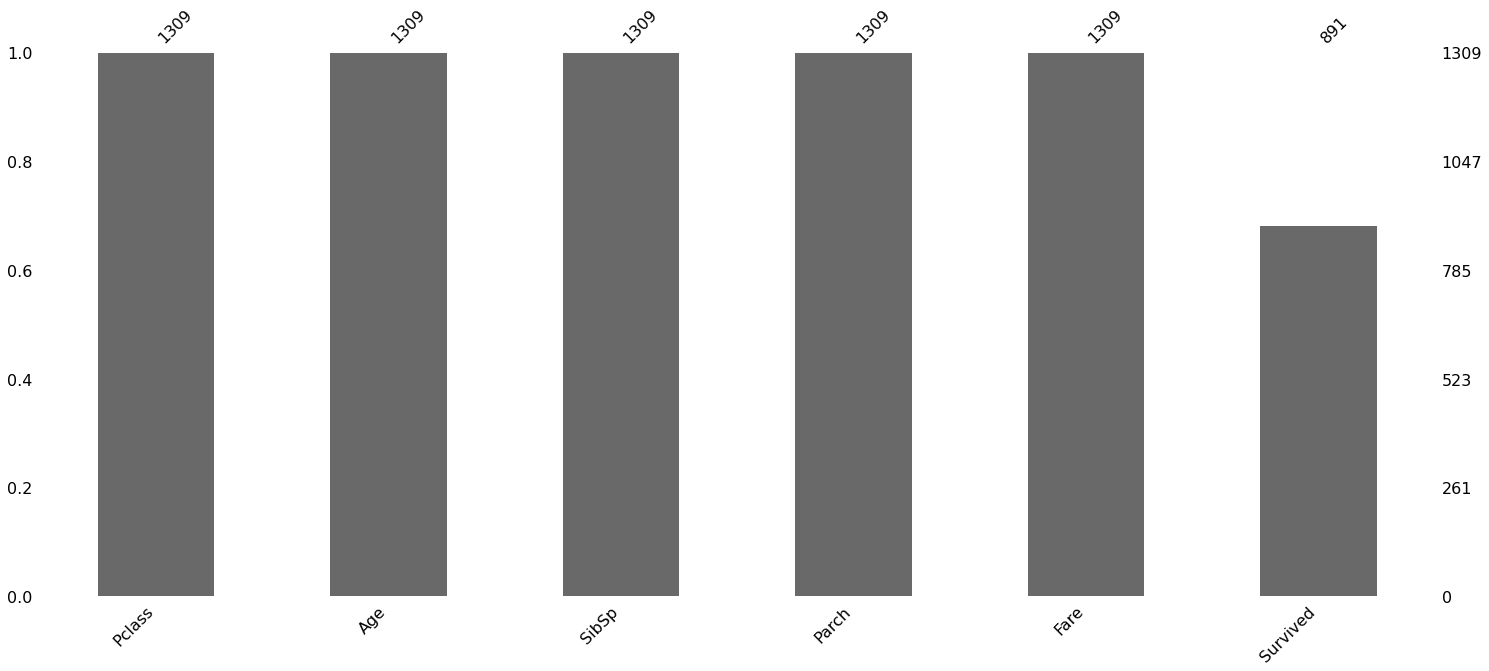

In [ ]:
msno.bar(data_num)

In [ ]:
# 학습용 데이터와 테스트 데이터로 구분

X_train = data_num.loc[data['TrainSplit'] == 'Train',['Pclass','Age','SibSp','Parch','Fare']]
y_train = data_num.loc[data['TrainSplit'] == 'Train','Survived']

In [ ]:
X_test = data_num.loc[data['TrainSplit'] == 'Test', ['Pclass','Age','SibSp','Parch','Fare']]

In [ ]:
X_train.dropna()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.000000,1,0,7.2500
1,1,38.000000,1,0,71.2833
2,3,26.000000,0,0,7.9250
3,1,35.000000,1,0,53.1000
4,3,35.000000,0,0,8.0500
...,...,...,...,...,...
886,2,27.000000,0,0,13.0000
887,1,19.000000,0,0,30.0000
888,3,29.881138,1,2,23.4500
889,1,26.000000,0,0,30.0000


In [ ]:
# 학습 데이터를 훈련용 80 : 검증용 20으로 나누기

from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle = True, random_state = 20)

In [ ]:
y_val.shape

(179,)

In [ ]:
from sklearn.metrics.pairwise import nan_euclidean_distances

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 80)

knn.fit(X_tr, y_tr) # 학습


ValueError: ignored

In [ ]:
# 제출용 파일 만들기

# 예측
y_test_pred = knn.predict(X_test)

# 제출 양식 submission에 정리
submission['Survived'] = y_test_pred.astype(int)

# 제출용 파일 저장
submission.to_csv(drivepath+'submission_01.csv', index = False)

ValueError: ignored

In [ ]:
# 피처 엔지니어링
# 모델 성능 개선할 수 있는 여러 가지 방법

train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

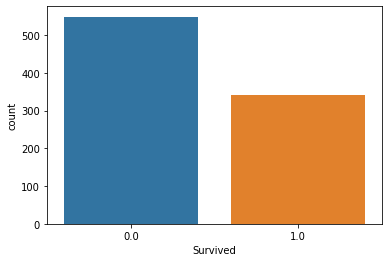

In [ ]:
sns.countplot(x = 'Survived', data = data[data['TrainSplit']=='Train'])

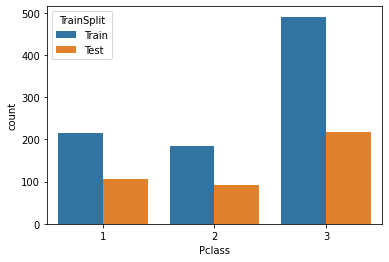

In [ ]:
# 객실 등급별(Pclass)

sns.countplot(x = 'Pclass', hue = 'TrainSplit', data= data)

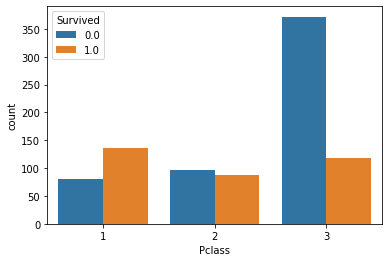

In [ ]:
sns.countplot(x = 'Pclass', hue = 'Survived', data= data)

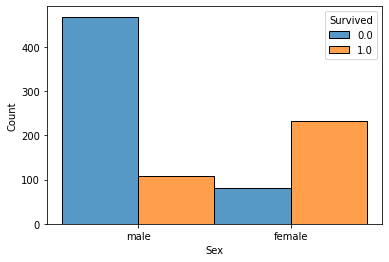

In [ ]:
# 성별
sns.histplot(x= 'Sex', hue = 'Survived', data=data[data['TrainSplit'] == 'Train'], multiple = 'dodge')

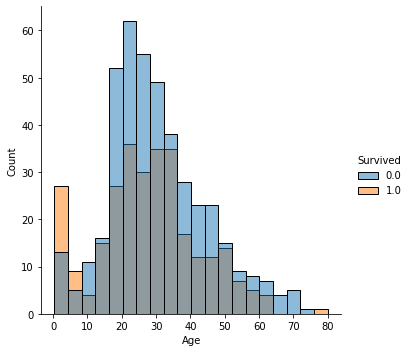

In [ ]:
# 나이
sns.displot(x = 'Age', hue = 'Survived', data=data[data['TrainSplit']== 'Train'])

In [ ]:
data_num = data.loc[:,['Sex','Pclass','Age','SibSp','Parch','Fare','Survived']]
data_num

,Sex,Pclass,Age,SibSp,Parch,Fare,Survived
0,male,3,22.0,1,0,7.2500,0.0
1,female,1,38.0,1,0,71.2833,1.0
2,female,3,26.0,0,0,7.9250,1.0
3,female,1,35.0,1,0,53.1000,1.0
4,male,3,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
413,male,3,NaN,0,0,8.0500,NaN
414,female,1,39.0,0,0,108.9000,NaN
415,male,3,38.5,0,0,7.2500,NaN
416,male,3,NaN,0,0,8.0500,NaN


In [ ]:
# 성별이 male과 female로 되어있는 성별 데이터를 숫자로 변경함

data_num.loc[data_num['Sex'] == 'female', 'Sex'] = 0
data_num.loc[data_num['Sex'] == 'male', 'Sex'] = 1
data_num['Sex'] = data_num['Sex'].astype(int)
data_num['Sex'].value_counts()

1    843
0    466
Name: Sex, dtype: int64

In [ ]:
data_num.corr()

,Sex,Pclass,Age,SibSp,Parch,Fare,Survived
Sex,1.000000,0.124617,0.063645,-0.109609,-0.213125,-0.185523,-0.543351
Pclass,0.124617,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.338481
Age,0.063645,-0.408106,1.000000,-0.243699,-0.150917,0.178740,-0.077221
SibSp,-0.109609,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.035322
Parch,-0.213125,0.018322,-0.150917,0.373587,1.000000,0.221539,0.081629
Fare,-0.185523,-0.558629,0.178740,0.160238,0.221539,1.000000,0.257307
Survived,-0.543351,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000


In [ ]:
# 학습용 데이터와 테스트 데이터로 구분

X_train = data_num.loc[data['TrainSplit'] == 'Train',['Pclass','Age','SibSp','Parch','Fare']]
y_train = data_num.loc[data['TrainSplit'] == 'Train','Survived']

X_test = data_num.loc[data['TrainSplit'] == 'Test', ['Pclass','Age','SibSp','Parch','Fare']]

from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle = True, random_state = 20)